### Classification project
#### Dataset iris.data

#### Load libs necessary

In [1]:
# load libs manipulation data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# preprocessing data
from sklearn.model_selection import train_test_split

# metrics model 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#### Load data

In [2]:
# load dataset

url = 'https://raw.githubusercontent.com/caiquemiranda/machine-learning-tiny-projects/main/data/iris_data.csv'
features = ['sepal-length', 'sepal-width', 'pental-length', 'pental-width', 'class']

iris = pd.read_csv(url, names=features)

#### Viz and preprocessing data

In [3]:
# visual-data

iris.head()

,sepal-length,sepal-width,pental-length,pental-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# info-data

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal-length   150 non-null    float64
 1   sepal-width    150 non-null    float64
 2   pental-length  150 non-null    float64
 3   pental-width   150 non-null    float64
 4   class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# describe-data

iris.describe()

,sepal-length,sepal-width,pental-length,pental-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# class distribution

iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

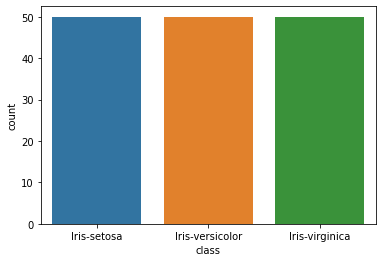

In [7]:
# viz-count class

sns.countplot(x='class', data=iris);

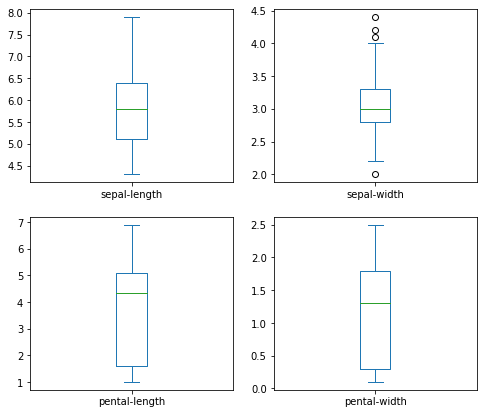

In [8]:
# viz-data boxplot

iris.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(8, 7))
plt.show()

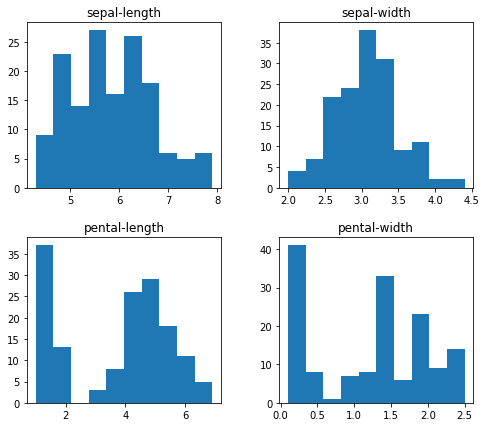

In [9]:
# viz-data histograms

iris.hist(grid=False, figsize=(8, 7))
plt.show()

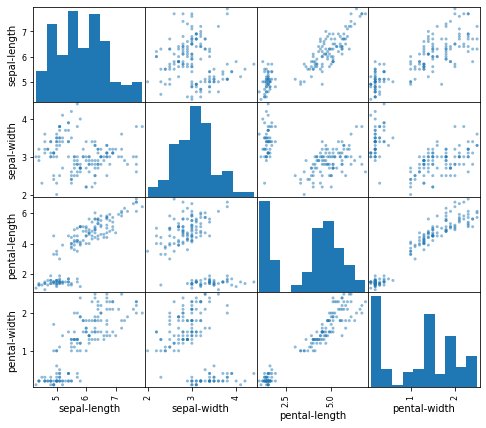

In [10]:
# viz-data scater plot matrix

scatter_matrix(iris, figsize=(8, 7))
plt.show()

In [11]:
# split data

array = iris.values
X = array[:, 0:4]            # featurs
y = array[:, 4]              # class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape    # return shape

((75, 4), (75, 4), (75,), (75,))

#### Training and evaluating the model

0.9466666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.85      1.00      0.92        23
 Iris-virginica       1.00      0.83      0.90        23

       accuracy                           0.95        75
      macro avg       0.95      0.94      0.94        75
   weighted avg       0.95      0.95      0.95        75



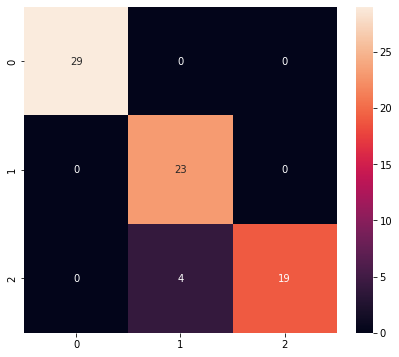

In [12]:
# k-neighbors model

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

predictions_knn = model_knn.predict(X_test)
print(accuracy_score(y_test, predictions_knn))
print(classification_report(y_test, predictions_knn))

plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predictions_knn), annot=True);


1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       1.00      1.00      1.00        23
 Iris-virginica       1.00      1.00      1.00        23

       accuracy                           1.00        75
      macro avg       1.00      1.00      1.00        75
   weighted avg       1.00      1.00      1.00        75



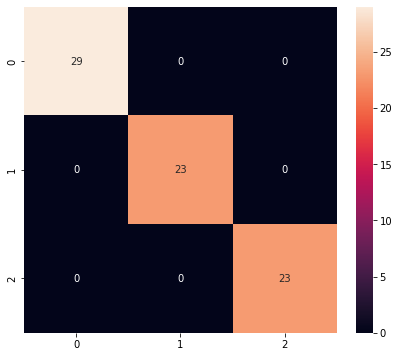

In [13]:
# svm model

model_svc = SVC()
model_svc.fit(X_train, y_train)

predictions_svc = model_svc.predict(X_test)
print(accuracy_score(y_test, predictions_svc))
print(classification_report(y_test, predictions_svc))

plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predictions_svc), annot=True);

0.9733333333333334
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.92      1.00      0.96        23
 Iris-virginica       1.00      0.91      0.95        23

       accuracy                           0.97        75
      macro avg       0.97      0.97      0.97        75
   weighted avg       0.98      0.97      0.97        75



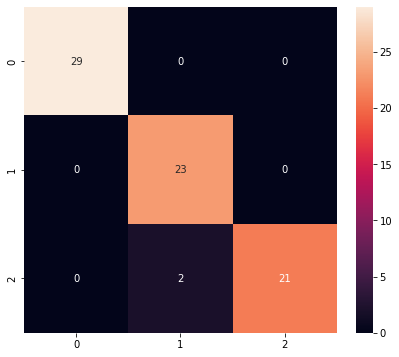

In [14]:
# random forest model

model_rf = RandomForestClassifier(n_estimators=5)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)
print(accuracy_score(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predictions_rf), annot=True);

1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       1.00      1.00      1.00        23
 Iris-virginica       1.00      1.00      1.00        23

       accuracy                           1.00        75
      macro avg       1.00      1.00      1.00        75
   weighted avg       1.00      1.00      1.00        75



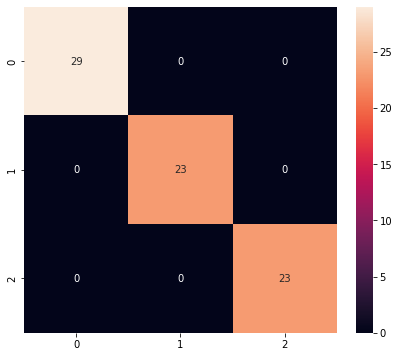

In [15]:
# logistic Regression model

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

predictions_lr = model_lr.predict(X_test)
print(accuracy_score(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))

plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predictions_lr), annot=True);